<a href="https://colab.research.google.com/github/neharana404/neharana404/blob/main/My_First_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My First ML Project**

## **Load Data**

In [37]:
import pandas as pd

# Maternal Mortality deaths in different US states from 2000-2020

df = pd.read_csv('https://raw.githubusercontent.com/neharana404/data/main/Underlying%20Cause%20of%20Death%20by%20Year.csv')
df = df.dropna()
df

,Year,Year Code,State,State Code,Deaths,Population,Crude Rate
0,2000,2000,California,6.0,56,24380130,0.2
1,2000,2000,Florida,12.0,29,11592392,0.3
2,2000,2000,Georgia,13.0,21,6018380,0.3
3,2000,2000,Illinois,17.0,19,8980011,Unreliable
4,2000,2000,Maryland,24.0,15,3881618,Unreliable
...,...,...,...,...,...,...,...
509,2020,2020,Tennessee,47.0,54,5156173,1.0
510,2020,2020,Texas,48.0,155,21651688,0.7
511,2020,2020,Virginia,51.0,46,6468397,0.7
512,2020,2020,Washington,53.0,17,5811843,Unreliable


## **Data preparation**

In [38]:
y = df['Deaths']
y

0       56
1       29
2       21
3       19
4       15
      ... 
509     54
510    155
511     46
512     17
513     15
Name: Deaths, Length: 494, dtype: int64

In [52]:
x = df.drop('Deaths', axis=1)
x = df.drop('Crude Rate', axis=1)
x = df.drop('State', axis=1)
x

,Year,Year Code,State Code,Deaths,Population,Crude Rate
0,2000,2000,6.0,56,24380130,0.2
1,2000,2000,12.0,29,11592392,0.3
2,2000,2000,13.0,21,6018380,0.3
3,2000,2000,17.0,19,8980011,Unreliable
4,2000,2000,24.0,15,3881618,Unreliable
...,...,...,...,...,...,...
509,2020,2020,47.0,54,5156173,1.0
510,2020,2020,48.0,155,21651688,0.7
511,2020,2020,51.0,46,6468397,0.7
512,2020,2020,53.0,17,5811843,Unreliable


## **Data Splitting**

In [53]:
from sklearn.model_selection import train_test_split

X = x.apply(pd.to_numeric, errors='coerce')
Y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

In [54]:
x_train

,Year,Year Code,State Code,Deaths,Population,Crude Rate
65,2004,2004,36.0,78,14168759,0.6
467,2019,2019,34.0,36,6640864,0.5
230,2011,2011,37.0,11,7194912,0.0
399,2017,2017,25.0,14,5266684,0.0
491,2020,2020,21.0,28,3338165,0.8
...,...,...,...,...,...,...
359,2016,2016,17.0,28,9590702,0.3
375,2016,2016,40.0,20,2872072,0.7
338,2015,2015,34.0,39,6723607,0.6
293,2013,2013,51.0,15,6248452,0.0


In [55]:
x_test

,Year,Year Code,State Code,Deaths,Population,Crude Rate
163,2009,2009,5.0,20,2124041,0.9
336,2015,2015,26.0,27,7454415,0.4
509,2020,2020,47.0,54,5156173,1.0
125,2007,2007,36.0,51,14303180,0.4
160,2008,2008,48.0,96,17654430,0.5
...,...,...,...,...,...,...
59,2004,2004,22.0,26,3332164,0.8
476,2019,2019,49.0,14,2284788,0.0
198,2010,2010,24.0,26,4341882,0.6
19,2001,2001,29.0,10,4097874,0.0


## **Model Building**

### **Linear Regression**

#### **Training the Model**

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### **Applying the model to make a prediction**

In [72]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [73]:
print(y_lr_train_pred)

[ 78.  36.  11.  14.  28.  11.  14. 101.  20.  35.  16.  11.  55.  16.
  40.  33.  10.  18.  11.  11.  19.  47.  23.  13.  18.  11.  48.  16.
  11.  49.  15.  11.  20.  15.  22.  30.  12. 155.  13.  19.  56.  24.
  37.  47.  13.  14.  19.  70. 145.  31.  11.  11.  44.  33.  17.  48.
  12.  47.  12.  22.  15.  50.  35.  20. 147.  13.  16.  50.  43.  56.
  10.  29.  27.  12.  13.  35.  50.  13.  29.  21.  12.  23.  21.  34.
  61. 104.  16.  39.  12.  10.  36.  10.  12.  40.  18.  40.  14.  16.
  16.  23.  10.  14.  22. 156.  15.  10.  11.  10.  64.  24.  18.  36.
  15.  30.  13.  16.  41. 101.  15.  25.  68.  35.  39.  39.  44.  40.
  98.  40.  10.  64.  35.  25.  88.  39.  16.  22.  46.  38.  71.  27.
  62.  12.  55.  10.  17.  10.  13.  41.  35.  85.  77.  16.  27.  38.
  34.  13.  62.  12.  12.  40.  37.  11.  24.  32.  11.  91.  14.  12.
  14.  35.  19.  12.  34.  13.  74.  81.  40.  82.  32.  45.  20.  15.
  16.  20.  16.  40.  32.  29.  94.  76.  10.  17.  36.  13.  17. 168.
  42. 

In [74]:
print(y_lr_test_pred)

[ 20.  27.  54.  51.  96.  60.  67.  25.  17. 147.  11.  12.  11.  16.
  23.  12.  22.  47.  13.  11.  17.  10.  17.  10.  12.  35.  11.  24.
  14.  45.  12.  30.  36.  80.  56.  12.  70.  39.  15.  57.  89.  40.
  22.  30.  26.  31.  15.  12.  10.  39.  28.  43.  10.  32.  34.  25.
  16.  35.  89.  31.  30.  17.  23.  11.  81.  17.  16.  14.  13.  40.
  83.  41.  48.  40.  42.  29.  34.  29.  15.  14. 127.  18.  14.  28.
 130.  15.  32.  18.  65.  88.  17.  18.  39.  33.  26.  14.  26.  10.
  12.]


#### **Evaluate Model Performance**

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [100]:
print('LR MSE (Train) : ', lr_train_mse)
print('LR R2 (Train) : ', lr_train_r2)
print('LR MSE (Test) : ', lr_test_mse)
print('LR R2 (Test) : ', lr_test_r2)


LR MSE (Train) :  3.7442572727288945e-19
LR R2 (Train) :  1.0
LR MSE (Test) :  4.137423584956935e-19
LR R2 (Test) :  1.0


In [101]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [102]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.0,1.0,0.0,1.0


### **Random Forest**

#### **Training the model**

In [103]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### **Applyting the model for prediction**

In [104]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

#### **Evaluate Model Performance**

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [106]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,31.612543,0.956297,32.691978,0.95679


### **Model Comparison**

In [108]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.0,1.0,0.0,1.0
1,Random Forest,31.612543,0.956297,32.691978,0.95679


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Test MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_4.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_5.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test MSE'].value_counts()
    for x_label, grp in _df_6.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Test MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_7.groupby('Test MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Test MSE')
_ = plt.ylabel('Test R2')

## **Data Visualization of predicted values**

Text(0.5, 0, 'Experimental Deaths')

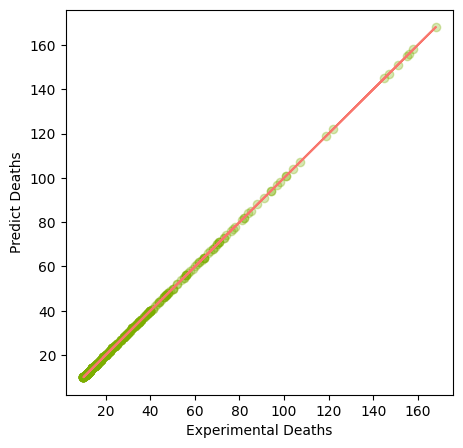

In [111]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Deaths')
plt.xlabel('Experimental Deaths')

Text(0.5, 0, 'Experimental Deaths')

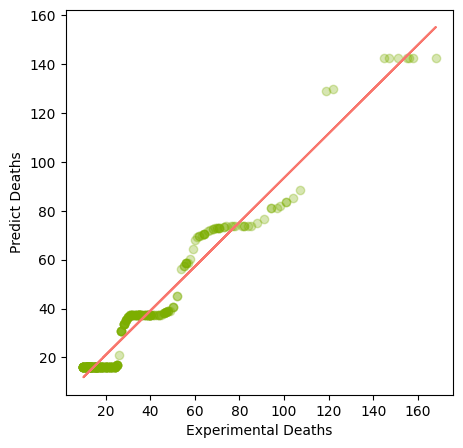

In [112]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train, y_rf_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Deaths')
plt.xlabel('Experimental Deaths')